In [5]:
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
from matplotlib import pyplot as plt
import os


def parse_tensorboard(path, scalars, prefix=""):
    """returns a dictionary of pandas dataframes for each requested scalar"""
    ea = event_accumulator.EventAccumulator(
        path,
        size_guidance={event_accumulator.SCALARS: 0},
    )
    _ = ea.Reload()
    df = pd.DataFrame(ea.Scalars(scalars[0]))
    df[f'{scalars[0]}'] = df['value']
    df.drop(columns=['value'], inplace=True)
    for k in scalars:
        df[k] = pd.DataFrame(ea.Scalars(k))['value']
    return df

In [21]:
ppo_0_logs = parse_tensorboard("tb/PPO-0", ["metrics/spl", "reward", "metrics/success"])
ppo0_1_logs = parse_tensorboard("tb/PPO-0.1", ["metrics/spl", "reward", "metrics/success"])
ppo0_2_logs = parse_tensorboard("tb/PPO-0.2", ["metrics/spl", "reward", "metrics/success"])
ppo0_3_logs = parse_tensorboard("tb/PPO-0.3", ["metrics/spl", "reward", "metrics/success"])

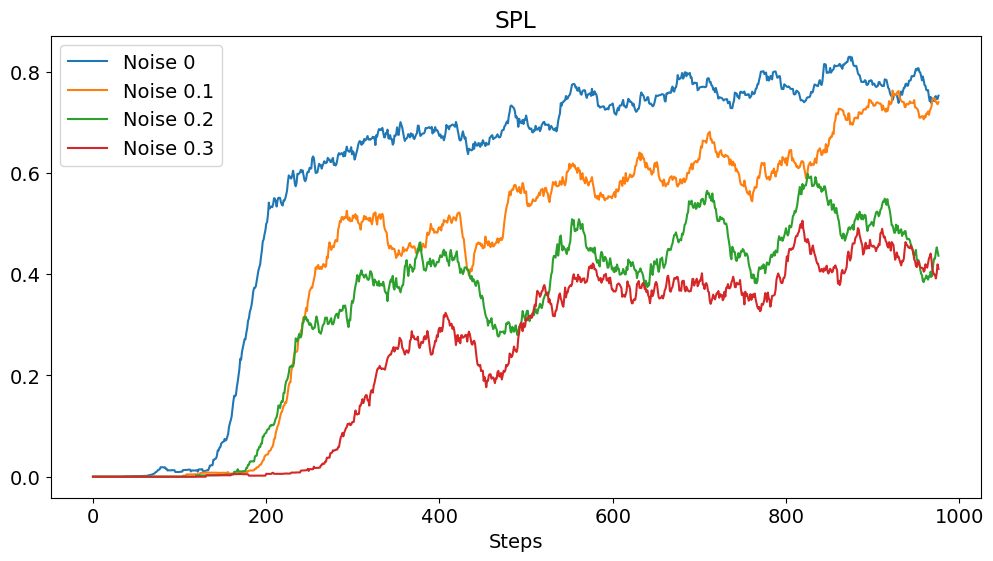

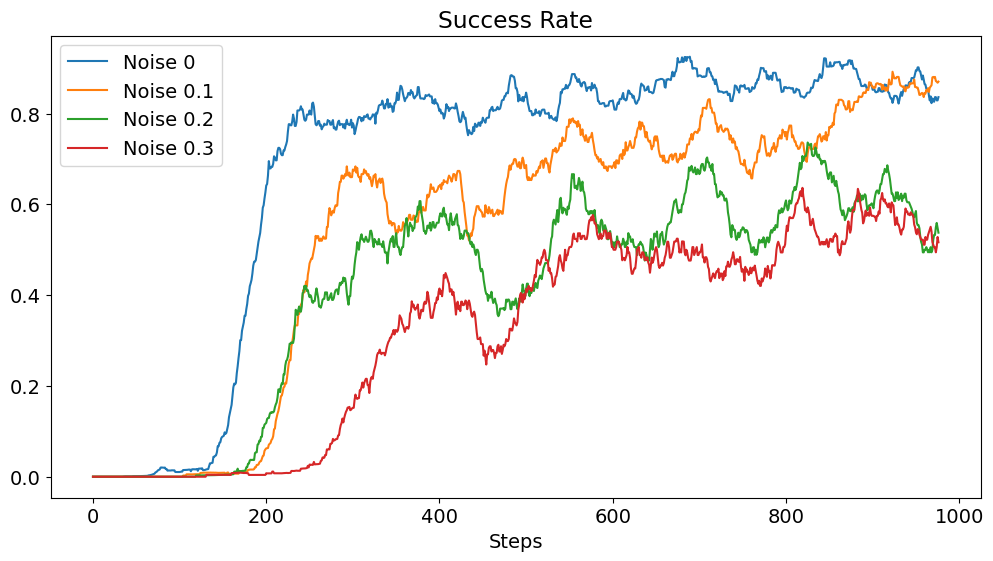

In [23]:
# Plot for SPL
# Increase font sizes for better readability
plt.rcParams.update({'font.size': 14})

# Plot for SPL
fig1, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(ppo_0_logs['metrics/spl'], label="Noise 0")
ax1.plot(ppo0_1_logs['metrics/spl'], label="Noise 0.1")
ax1.plot(ppo0_2_logs['metrics/spl'], label="Noise 0.2")
ax1.plot(ppo0_3_logs['metrics/spl'], label="Noise 0.3")
ax1.set_title("SPL")
ax1.set_xlabel("Steps")
ax1.legend()

# Plot for Success Rate
fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.plot(ppo_0_logs['metrics/success'], label="Noise 0")
ax2.plot(ppo0_1_logs['metrics/success'], label="Noise 0.1")
ax2.plot(ppo0_2_logs['metrics/success'], label="Noise 0.2")
ax2.plot(ppo0_3_logs['metrics/success'], label="Noise 0.3")
ax2.set_title("Success Rate")
ax2.set_xlabel("Steps")
ax2.legend()

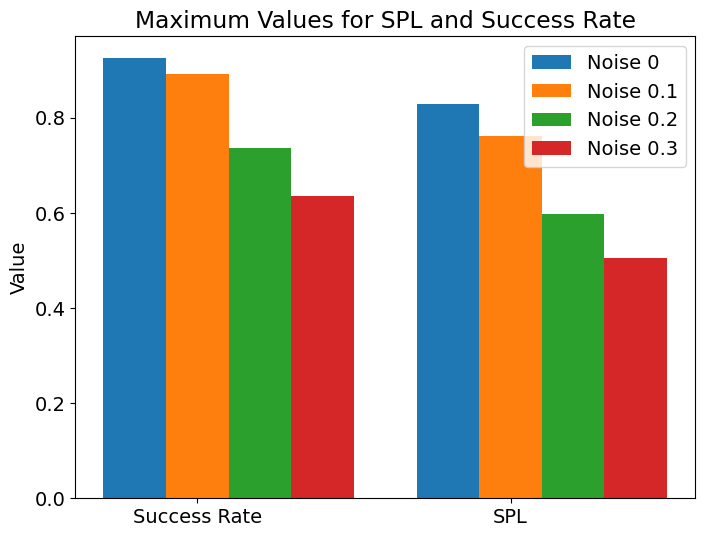

In [25]:
# Calculate the maximum values for SPL and success rate
max_values = {
    "Log": ["PPO-0.1", "PPO-0.2", "PPO-0.3"],
    "Max SPL": [
        ppo_0_logs["metrics/spl"].max(),
        ppo0_1_logs["metrics/spl"].max(),
        ppo0_2_logs["metrics/spl"].max(),
        ppo0_3_logs["metrics/spl"].max(),
    ],
    "Max Success Rate": [
        ppo_0_logs["metrics/success"].max(),
        ppo0_1_logs["metrics/success"].max(),
        ppo0_2_logs["metrics/success"].max(),
        ppo0_3_logs["metrics/success"].max(),
    ],
}

# Create a DataFrame for the max values with separate columns for SPL and Success
max_values_transposed = {
    "Metric": ["Success Rate", "SPL"],
    "PPO-0.0": [max_values["Max Success Rate"][0], max_values["Max SPL"][0]],
    "PPO-0.1": [max_values["Max Success Rate"][1], max_values["Max SPL"][1]],
    "PPO-0.2": [max_values["Max Success Rate"][2], max_values["Max SPL"][2]],
    "PPO-0.3": [max_values["Max Success Rate"][3], max_values["Max SPL"][3]],
}

# Convert to DataFrame
max_df_transposed = pd.DataFrame(max_values_transposed)

# Plot the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.2  # Bar width
x = range(len(max_df_transposed["Metric"]))

# Plot each PPO log side by side
ax.bar(x, max_df_transposed["PPO-0.0"], width, label="Noise 0")
ax.bar([i + width for i in x], max_df_transposed["PPO-0.1"], width, label="Noise 0.1")
ax.bar([i + 2 * width for i in x], max_df_transposed["PPO-0.2"], width, label="Noise 0.2")
ax.bar([i + 3 * width for i in x], max_df_transposed["PPO-0.3"], width, label="Noise 0.3")

# Add labels and legend
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(max_df_transposed["Metric"])
ax.set_title("Maximum Values for SPL and Success Rate")
ax.set_ylabel("Value")
ax.legend()

plt.show()